### Import libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [14]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Visualization

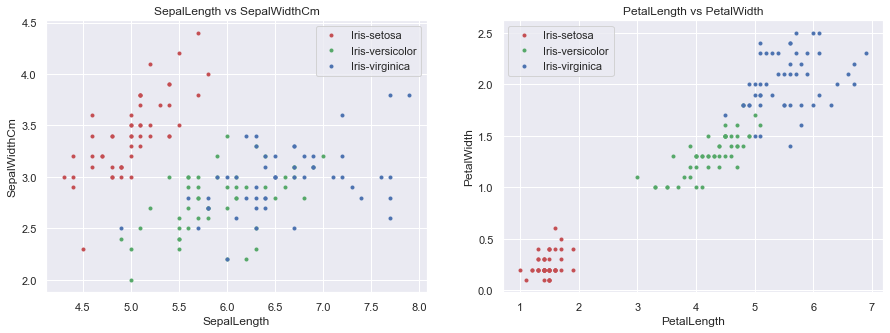

In [8]:
cat1 = data[data['Species']=='Iris-setosa']
cat2 = data[data['Species']=='Iris-versicolor']
cat3 = data[data['Species']=='Iris-virginica']

plt.figure(figsize=(15, 5))

plt.subplot(121)

plt.plot(cat1['SepalLengthCm'], cat1['SepalWidthCm'], 'r.', label = 'Iris-setosa')
plt.plot(cat2['SepalLengthCm'], cat2['SepalWidthCm'], 'g.', label = 'Iris-versicolor')
plt.plot(cat3['SepalLengthCm'], cat3['SepalWidthCm'], 'b.', label = 'Iris-virginica')

plt.title('SepalLength vs SepalWidthCm')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidthCm')
plt.legend()

plt.subplot(122)
plt.plot(cat1['PetalLengthCm'], cat1['PetalWidthCm'], 'r.', label = 'Iris-setosa')
plt.plot(cat2['PetalLengthCm'], cat2['PetalWidthCm'], 'g.', label = 'Iris-versicolor')
plt.plot(cat3['PetalLengthCm'], cat3['PetalWidthCm'], 'b.', label = 'Iris-virginica')

plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

plt.show()

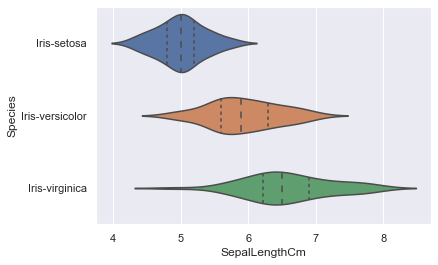

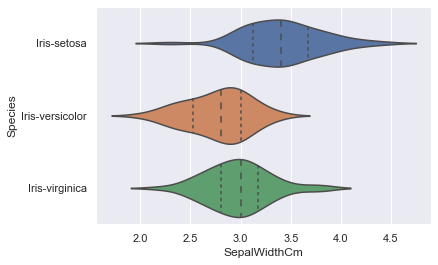

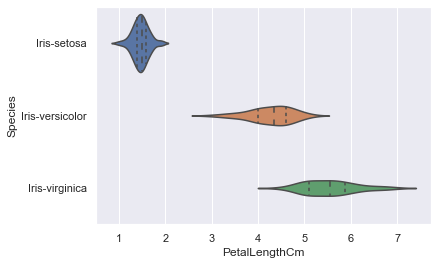

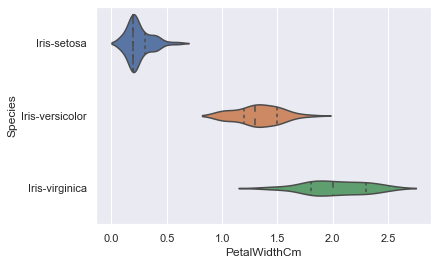

In [15]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

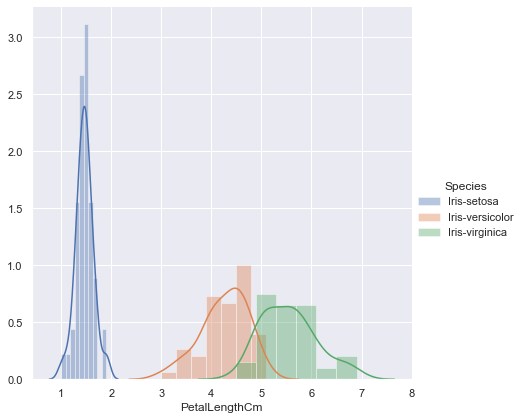

In [22]:
sns.FacetGrid(data,hue="Species",height=6).map(sns.distplot,"PetalLengthCm").add_legend();

### Train Test Split

In [13]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']

In [16]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


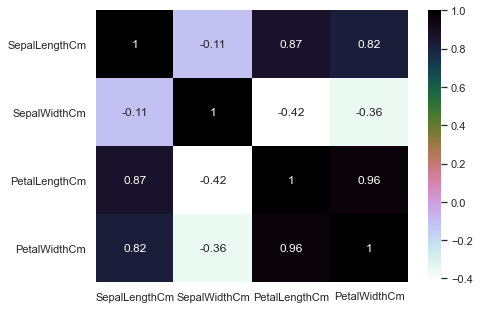

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r')
#draws  heatmap with input as the correlation matrix calculted by(X.corr())
plt.show()

In [26]:
# Splitting the data in 70% and 30% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Fitting

In [29]:
model=DecisionTreeClassifier()

In [30]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Evaluation

In [31]:
train_accuracy = model.score(X_train, y_train)
print('Train-set accuracy \t: ', train_accuracy)

test_accuracy = model.score(X_test, y_test)
print('Test-set accuracy \t: ', test_accuracy)

Train-set accuracy 	:  1.0
Test-set accuracy 	:  0.98


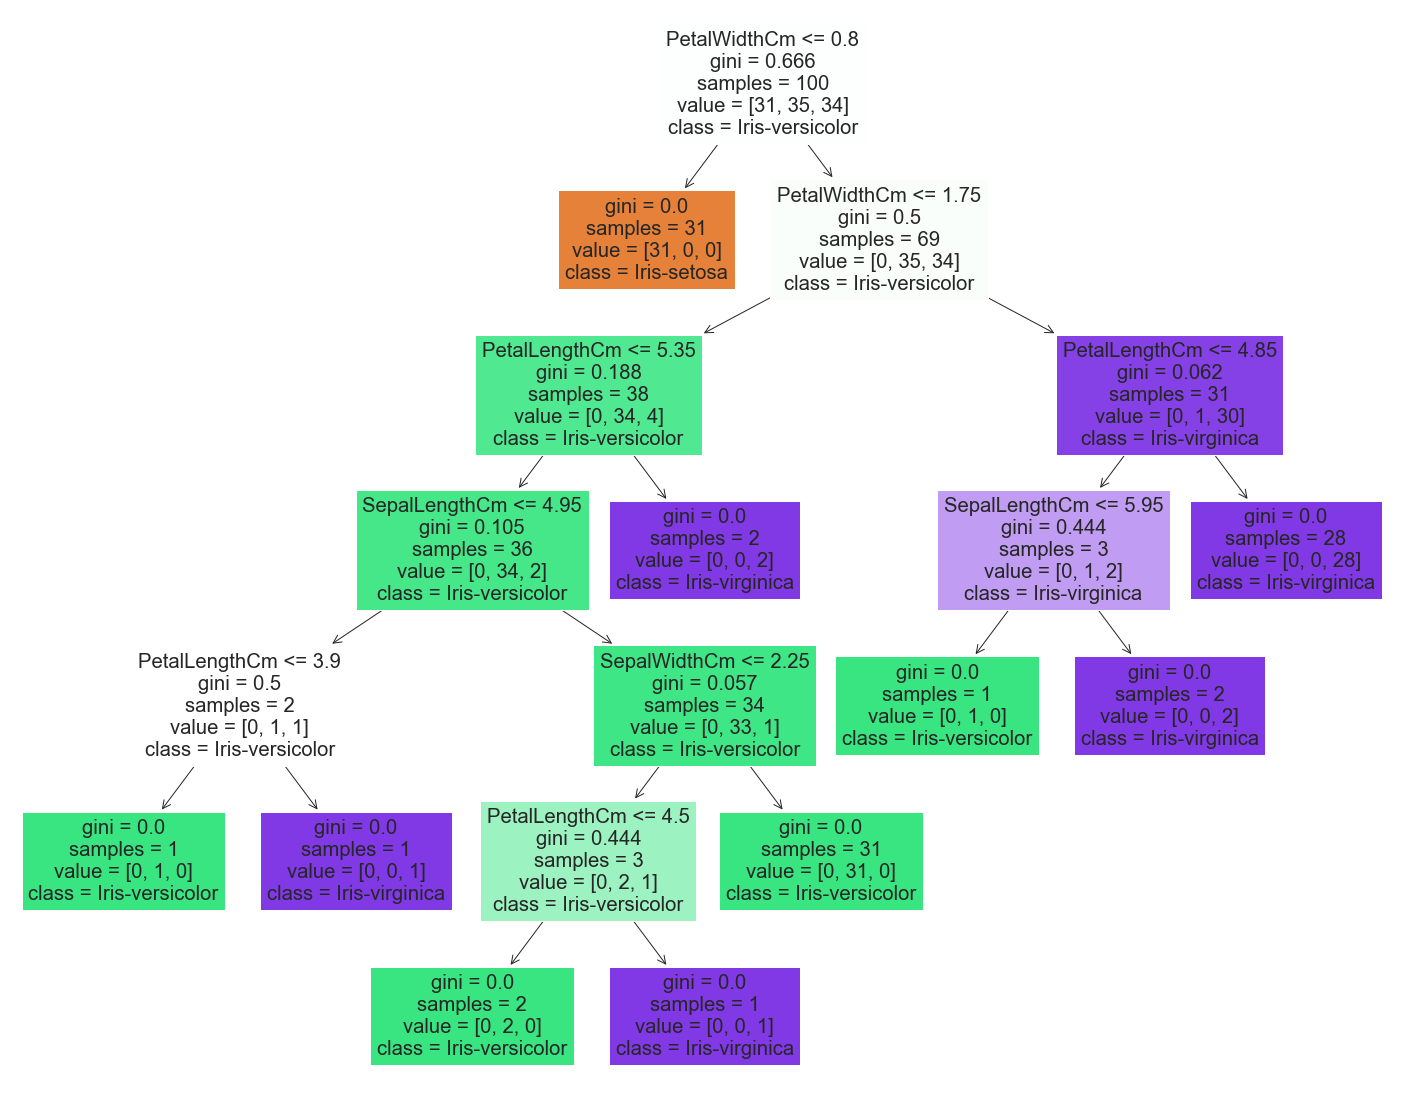

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True)
